In [1]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Activate pandas conversion for rpy2
pandas2ri.activate()

In [3]:
# Install R packages if they are not already installed (this part might need some tweaking depending on your setup)
try:
    remotes = importr('remotes')
    remotes.install_github("role-model/roleR", dependencies=True)
except Exception as e:
    print(f"Error installing R packages: {e}")
    print("Make sure you have R and the 'remotes' package installed correctly.")
    exit()

R[write to console]: Using GitHub PAT from the git credential store.

R[write to console]: Skipping install of 'roleR' from a github remote, the SHA1 (cc6546a1) has not changed since last install.
  Use `force = TRUE` to force installation



In [4]:
# Import the R packages
try:
    roleR = importr('roleR')
except Exception as e:
     print(f"Error importing R packages: {e}")
     exit()

In [35]:
# Create the roleParams object in R
p = roleR.roleParams(
    individuals_local=100,
    individuals_meta=1000,
    species_meta=50,
    speciation_local=0.05,
    speciation_meta=0.05,
    extinction_meta=0.05,
    env_sigma=0.5,
    trait_sigma=1,
    comp_sigma=0.5,
    dispersal_prob=0.1,
    mutation_rate=0.01,
    equilib_escape=1,
    num_basepairs=250,
    init_type='oceanic_island',
    niter=10000,
    niterTimestep=10
)

# Run the roleModel and runRole in R
model = roleR.runRole(roleR.roleModel(p))

# Get the summary statistics.  This is the crucial part where we use
# a named list for the functions to apply.
stats = roleR.getSumStats(model, robjects.ListVector({'rich': roleR.richness, 'hill_abund': roleR.hillAbund}))

# Convert the R dataframe to a pandas DataFrame
stats_df = pandas2ri.rpy2py(stats)


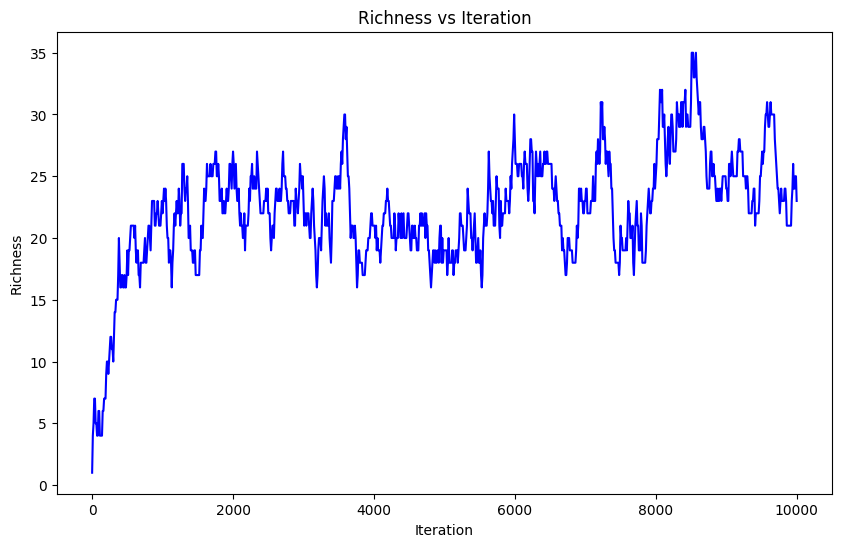

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(stats_df['iteration'], stats_df['rich'], color='blue')
plt.xlabel('Iteration')
plt.ylabel('Richness')
plt.title('Richness vs Iteration')
plt.show()